In [20]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
df=pd.read_csv(r'C:\Users\pedro\Desktop\ironhack\LAB_costumer_analysis_round7\lab-customer-analysis-round-7\files_for_lab\csv_files\marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [22]:
#a function that standerdizes all the columns names and deletes null values if there is any
def clean_data (dataframe):
    cols = [] 

    for i in range(len(dataframe.columns)):
        cols.append(dataframe.columns[i].lower().replace(' ','_'))
    dataframe.columns = cols

    for column in dataframe.columns:
        if dataframe[column].isnull().any():
            dataframe = dataframe.dropna(subset=[column])

    dataframe.drop_duplicates()

   
    return dataframe


In [23]:
clean_data (df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [24]:
#check for the data types
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [25]:
# decide which features to drop before do a  one-hot-encoding.
df=df.drop(['customer', 'effective_to_date','location_code', 'education', 'renew_offer_type'], axis=1)
df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Employed,F,56274,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Unemployed,F,0,Single,94,13,42,0,8,Personal Auto,Personal L3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Employed,F,48767,Married,108,18,38,0,2,Personal Auto,Personal L3,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Unemployed,M,0,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Employed,M,43836,Single,73,12,44,0,1,Personal Auto,Personal L1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Employed,M,71941,Married,73,18,89,0,2,Personal Auto,Personal L1,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,Employed,F,21604,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Unemployed,M,0,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,Employed,M,21941,Married,96,34,3,0,3,Personal Auto,Personal L2,Branch,691.200000,Four-Door Car,Large


In [26]:
df['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [27]:
df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [28]:
df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [29]:
df['sales_channel'].nunique()

4

In [30]:
df['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [31]:
df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [32]:
df['employmentstatus'].unique()


array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [33]:
df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [34]:
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [35]:
df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [36]:
df = pd.get_dummies(df, columns = ['marital_status','coverage', 'gender', 'sales_channel', 'policy_type', 'response', 'vehicle_size'])

In [37]:
categorical_df = df.select_dtypes(object)
categorical_df

,state,employmentstatus,policy,vehicle_class
0,Washington,Employed,Corporate L3,Two-Door Car
1,Arizona,Unemployed,Personal L3,Four-Door Car
2,Nevada,Employed,Personal L3,Two-Door Car
3,California,Unemployed,Corporate L2,SUV
4,Washington,Employed,Personal L1,Four-Door Car
...,...,...,...,...
9129,California,Employed,Personal L1,Four-Door Car
9130,California,Employed,Corporate L3,Four-Door Car
9131,California,Unemployed,Corporate L2,Four-Door Car
9132,California,Employed,Personal L2,Four-Door Car


In [38]:
numerical_df=df.select_dtypes(np.number)
numerical_df


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,marital_status_Divorced,marital_status_Married,...,sales_channel_Call Center,sales_channel_Web,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,...,0,0,1,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,1,0,1,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,1,0,1,0,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,1,0,1,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,1,...,0,1,0,1,0,1,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1,0,...,0,0,1,0,0,0,1,0,1,0
9131,8163.890428,0,85,9,37,3,2,790.784983,0,0,...,0,0,1,0,0,1,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,1,...,0,0,0,1,0,1,0,1,0,0


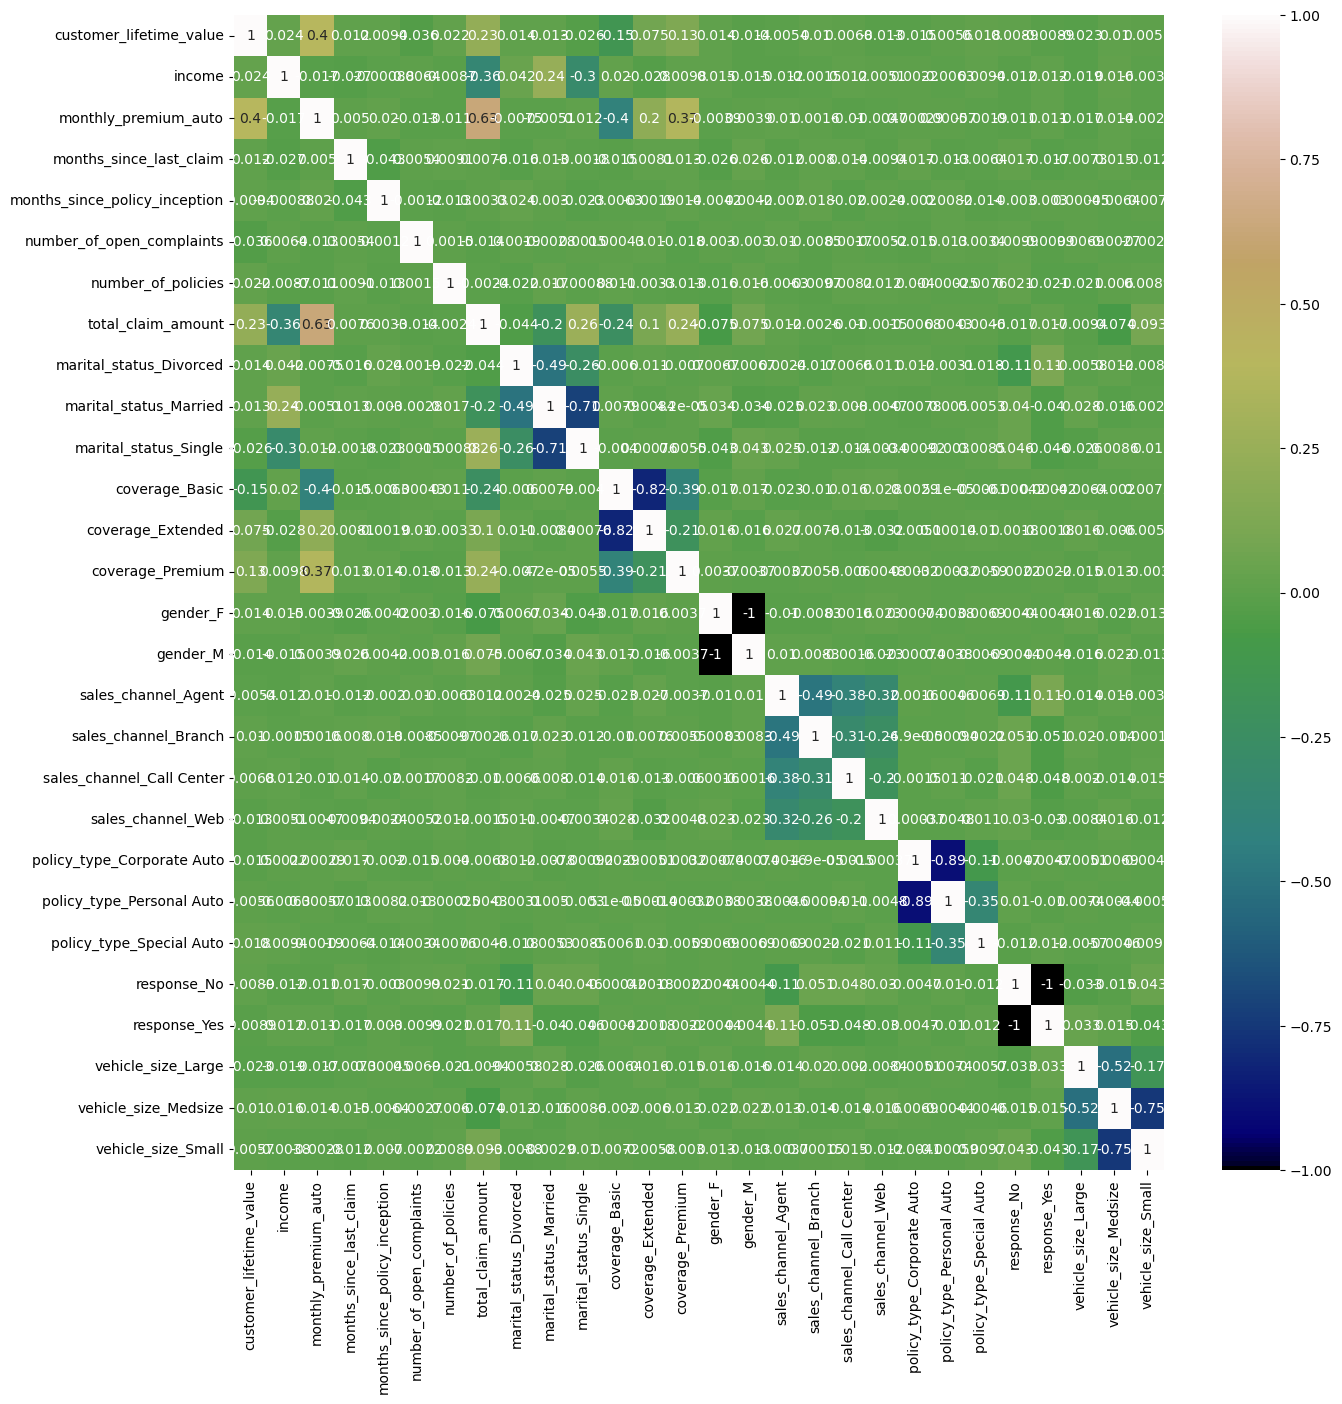

In [39]:
#correlation to cheack how the features correlate to our target variable
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(numerical_df.corr(),cmap='gist_earth',annot=True)
plt.show()


In [40]:
Y = numerical_df['total_claim_amount']
X = numerical_df.drop(['total_claim_amount'], axis=1)

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     572.2
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -61049.
No. Observations:                9134   AIC:                         1.221e+05
Df Residuals:                    9113   BIC:                         1.223e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            22.9466      2.952      7.773      0.000      17.160      28.733
customer_lifetime_value          -0.0005      0.000     -1.504      0.133      -0.001       0.000
income                           -0.0028   7.01e-05    -40.360      0.000      -0.003      -0.003
monthly_premium_auto              5.3592      0.071     75.101      0.000       5.219       5.499
months_since_last_claim          -0.0795      0.202     -0.394      0.694      -0.475       0.316
months_since_policy_inception    -0.0769      0.073     -1.057      0.290      -0.220       0.066
number_of_open_complaints        -1.2672      2.228     -0.569      0.570      -5.635       3.100
number_of_policies                0.2111      0.849      0.249      0.804      -1.453       1.876
marital_status_Divorced         -20.1087      4.080     -4.928      0.000     -28.107     -12.111
marital_status_Married          -32.0021      3.000    -10.666      0.000     -37.883     -26.121
marital_status_Single            75.0575      3.471     21.625      0.000      68.254      81.861
coverage_Basic                   12.7162      3.170      4.012      0.000       6.503      18.930
coverage_Extended                -3.8395      3.477     -1.104      0.270     -10.655       2.976
coverage_Premium                 14.0699      5.534      2.543      0.011       3.222      24.917
gender_F                         -6.4538      2.475     -2.607      0.009     -11.306      -1.602
gender_M                         29.4003      2.546     11.547      0.000      24.409      34.391
sales_channel_Agent               3.2903      3.219      1.022      0.307      -3.020       9.600
sales_channel_Branch              4.5016      3.527      1.276      0.202      -2.412      11.416
sales_channel_Call Center         6.1845      4.006      1.544      0.123      -1.668      14.037
sales_channel_Web                 8.9703      4.451      2.016      0.044       0.246      17.694
policy_type_Corporate Auto        1.8737      4.450      0.421      0.674      -6.849      10.597
policy_type_Personal Auto         5.8217      3.795      1.534      0.125      -1.617      13.260
policy_type_Special Auto         15.2511      7.168      2.128      0.033       1.200      29.302
response_No                       1.9650      3.027      0.649      0.516      -3.969       7.899
response_Yes                     20.9815      3.523      5.956      0.000      14.076      27.887
vehicle_size_Large               -5.2800      4.749     -1.112      0.266     -14.590       4.030
vehicle_size_Medsize            -21.4948      3.072     -6.998      0.000     -27.516     -15.474
vehicle_size_Small               49.7213      3.949     12.590      0.000      41.980      57.463
=============================================

In [41]:
Y = numerical_df['total_claim_amount']
X = numerical_df.drop(['total_claim_amount'], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(y_test, predictions),2))


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.54
The mse of the model is =  36902.37532051269
The root mse of the model is =  192.09990973582651
The mean absolute error of the model is =  138.8435043709701


In [42]:
from sklearn.preprocessing import MinMaxScaler

num_data = numerical_df.drop(['total_claim_amount'], axis=1)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_data)
normalized_data = pd.DataFrame(normalized_data, columns=num_data.columns)
normalized_data

Y = numerical_df['total_claim_amount']
X = normalized_data

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     572.2
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -61049.
No. Observations:                9134   AIC:                         1.221e+05
Df Residuals:                    9113   BIC:                         1.223e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           113.9798      2.312     49.305      0.000     109.448     118.511
customer_lifetime_value         -39.4492     26.234     -1.504      0.133     -90.873      11.974
income                         -282.7174      7.005    -40.360      0.000    -296.449    -268.986
monthly_premium_auto           1270.1291     16.912     75.101      0.000    1236.977    1303.281
months_since_last_claim          -2.7809      7.059     -0.394      0.694     -16.617      11.055
months_since_policy_inception    -7.6158      7.203     -1.057      0.290     -21.736       6.504
number_of_open_complaints        -6.3362     11.141     -0.569      0.570     -28.174      15.502
number_of_policies                1.6889      6.793      0.249      0.804     -11.626      15.004
marital_status_Divorced          10.2357      4.041      2.533      0.011       2.314      18.158
marital_status_Married           -1.6577      2.934     -0.565      0.572      -7.409       4.094
marital_status_Single           105.4019      3.411     30.905      0.000      98.717     112.087
coverage_Basic                   43.0606      3.300     13.048      0.000      36.592      49.530
coverage_Extended                26.5049      3.443      7.698      0.000      19.756      33.254
coverage_Premium                 44.4143      5.375      8.263      0.000      33.878      54.951
gender_F                         39.0629      2.308     16.927      0.000      34.539      43.587
gender_M                         74.9169      2.366     31.663      0.000      70.279      79.555
sales_channel_Agent              26.0486      3.186      8.177      0.000      19.804      32.293
sales_channel_Branch             27.2599      3.499      7.790      0.000      20.400      34.120
sales_channel_Call Center        28.9428      3.981      7.270      0.000      21.139      36.747
sales_channel_Web                31.7286      4.424      7.172      0.000      23.056      40.401
policy_type_Corporate Auto       32.2182      4.404      7.316      0.000      23.586      40.851
policy_type_Personal Auto        36.1661      3.743      9.663      0.000      28.829      43.503
policy_type_Special Auto         45.5955      7.146      6.381      0.000      31.588      59.603
response_No                      47.4817      2.893     16.415      0.000      41.812      53.152
response_Yes                     66.4981      3.395     19.589      0.000      59.844      73.153
vehicle_size_Large               25.0644      4.716      5.315      0.000      15.820      34.309
vehicle_size_Medsize              8.8496      3.005      2.945      0.003       2.960      14.739
vehicle_size_Small               80.0657      3.898     20.538      0.000      72.424      87.708
=============================================

In [43]:
Y = numerical_df['total_claim_amount']
X = normalized_data

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(y_test, predictions),2))


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.54
The mse of the model is =  36903.631537153065
The root mse of the model is =  192.103179404072
The mean absolute error of the model is =  138.81684998850577


In [ ]:
# after i did one hot encoding on gender and marital status i improved my model. 